In [65]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [66]:
# Dictionary allows us to easily just type our value and get the state rather than remembering the index value

state_conversion = {
    'flammable': 0,
    'growing': 1,
    'burnt': 2,
    'burning': 3,
}

In [67]:
# Define a 4 dimensional board tracking each aspect
board_size = (4, 20, 20)
large_board = np.zeros(shape=board_size)

In [68]:
# plots the board by summing up all existing values and using Reds to showcase them.
def plot_board(board):
    img = plt.imshow(sum(board),cmap='Reds')
    return img

In [69]:
def get_cell(board: np.array, state: str, row: int, col: int) -> np.array:
    cell_state = state_conversion[state]
    
    return board[cell_state][row % board.shape[1]][col % board.shape[2]]

def set_cell(board, state, row, col, value):
    cell_state = state_conversion[state]

    board[cell_state][row % board.shape[1]][col % board.shape[2]] = value
    return board

def is_flammable(board, row, col):
    return board[0][row][col]

def is_growing(board, row, col):
    return board[1][row][col]

def is_burnt(board, row, col):
    return board[2][row][col]

def is_burning(board, row, col):
    return board[3][row][col]

In [70]:
# fire spreading criteria:

def start_fire(board_size, p):
    random_cells = np.random.rand(board_size[1],board_size[2])
    board = np.zeros(board_size[1:])
    board[random_cells > 1-p] = 1
    return board

large_board[state_conversion['burning']] = start_fire(board_size, 0.02)


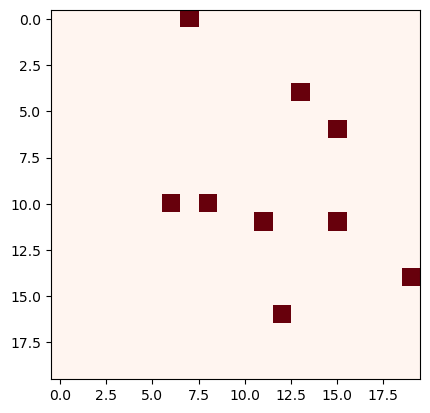

In [71]:
plot_board(large_board)

In [ ]:
def step(large_board):
    board_size = large_board.shape

    for i in range(board_size[1]):
        for j in range(board_size[2]):
            if is_burning(large_board, row=i, col=j):
                large_board = set_cell(large_board, state='burning', row=i, col=j, value=0)
                large_board = set_cell(large_board, state='burnt', row=i, col=j, value=1)
            
            if is_burnt(large_board, row=i, col=j):
                large_board = set_cell(large_board, state='burnt', row=i, col=j, value=0)
                large_board = set_cell(large_board, state='growing', row=i, col=j, value=1)
            
            if is_growing(large_board, row=i, col=j):
                large_board = set_cell(large_board, state='growing', row=i, col=j, value=0)
                large_board = set_cell(large_board, state='flammable', row=i, col=j, value=1)

    return large_board

In [83]:
large_board = step(large_board)

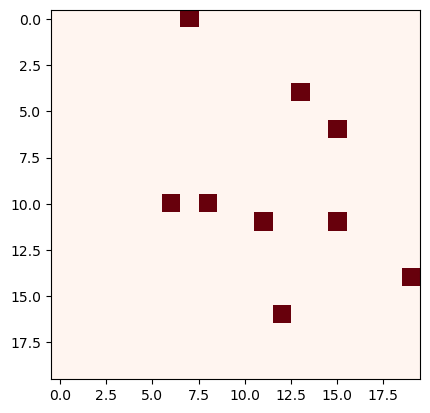

In [84]:
plot_board(large_board)